In [1]:
#@title imports
import numpy as np
import matplotlib.pyplot as plt

Tenemos que encontrar raices de la siguiente función:
$f(x)=x^{3}-6x^{2}+11x-6$
es decir buscamos $x$'s tales que $f(x)=0$, sin embargo, necesitamos una función para hacer iteración de punto fijo, osea, una función del tipo $g(x)=x$, por lo que tenemos que adaptar la función original:


*   Opción 1:

    $f(x)=x^{3}-6x^{2}+11x-6=0$

    $x^{3}-6x^{2}-6=-11x$

    $\frac{x^{3}-6x^{2}-6}{-11}=x$

    $g(x)=x=\frac{6x^{2}+6-x^{3}}{11}$

*   Opción 2:

    $f(x)=x^{3}-6x^{2}+11x-6=0$

    $x^{3}+11x-6=6x^{2}$

    $g(x)=x=\frac{x^{3}+11x-6}{6x}$

*   Opción 3:

    $f(x)=x^{3}-6x^{2}+11x-6=0$

    $x^{3}+11x-6=6x^{2}$

    $\frac{x^{3}+11x-6}{6}=x^{2}$

    $g(x)=x=\sqrt{\frac{x^{3}+11x-6}{6}}$

*   Opcion 4:

    $f(x)=x^{3}-6x^{2}+11x-6=0$

    $6x^{2}-11x+6=x^{3}$

    $g(x) = x =\sqrt[3]{6x^{2} - 11x + 6}$

*Notar que las opciones 2 y 3 son validas solo porque sabemos que las raices son todas mayor a 0.*

Debemos buscar en el intervalo $(0,5)$ pero sería positivo primero visualizar la función.

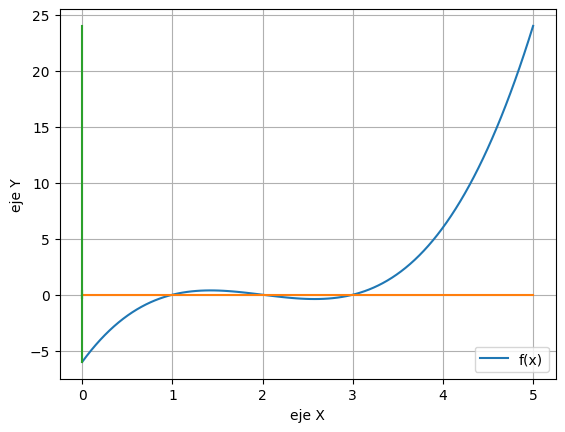

In [6]:
#@title grafica de f(x)
f = lambda x: np.power(x,3) - 6*np.power(x,2) + 11*x - 6

x=np.linspace(0,5,100)
y=f(x)
plt.plot(x,y, label='f(x)')
plt.plot(x,[0]*len(x)) #una recta horizontal fijada en y=0
plt.plot([0]*len(y),y) #una recta vertical fijada en x=0

plt.grid(True)
plt.ylabel('eje Y')
plt.xlabel('eje X')
plt.legend()
plt.show()

In [7]:
#@title ipf
def ipf(g,r, iters, prints=False):
  for iter in np.arange(iters):
    r=g(r)
    if(prints):
      print(iter, r)
  return r

In [8]:
# Opción 1
def g1(x):
    return (6 * x**2 + 6 - x**3) / 11

# Opción 2
def g2(x):
    return (x**3 + 11 * x - 6) / (6 * x)

# Opción 3
def g3(x):
    return np.sqrt((x**3 + 11 * x - 6) / 6)

# Opción 4
def g4(x):
    return np.cbrt(6 * x**2 - 11 * x + 6)

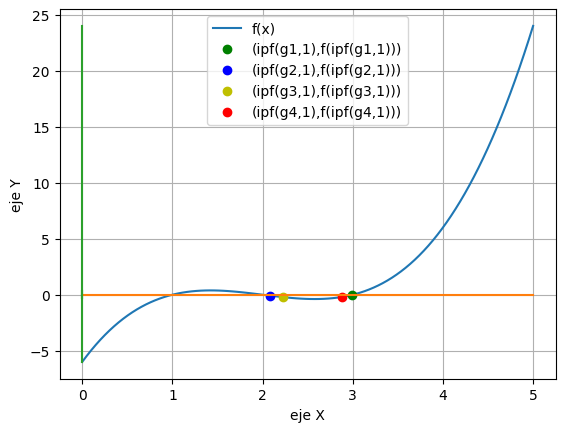

In [6]:
#@title grafica de la raices encontradas
x=np.linspace(0,5,100)
y=f(x)
s_point = 2.5
iters = 25
plt.plot(x,y, label='f(x)')

plt.plot(ipf(g1,s_point,iters),f(ipf(g1,s_point,iters)), 'go', label='(ipf(g1,1),f(ipf(g1,1)))')
plt.plot(ipf(g2,s_point,iters),f(ipf(g2,s_point,iters)), 'bo', label='(ipf(g2,1),f(ipf(g2,1)))')
plt.plot(ipf(g3,s_point,iters),f(ipf(g3,s_point,iters)), 'yo', label='(ipf(g3,1),f(ipf(g3,1)))')
plt.plot(ipf(g4,s_point,iters),f(ipf(g4,s_point,iters)), 'ro', label='(ipf(g4,1),f(ipf(g4,1)))')

#graficando los ejes cartesianos
plt.plot(x,[0]*len(x))
plt.plot([0]*len(y),y)

plt.grid(True)
plt.ylabel('eje Y')
plt.xlabel('eje X')
plt.legend()
plt.show()

In [11]:
g1 = lambda x: (6 * x**2 + 6 - x**3) / 11
ipf(g1, 2.5, 15, prints=True)

0 2.534090909090909
1 2.568794529275664
2 2.6037739854974267
3 2.638653293685399
4 2.6730315342945654
5 2.7065013040125026
6 2.7386699723507477
7 2.769181519351152
8 2.7977363197089833
9 2.8241063469154466
10 2.8481439354560796
11 2.8697833151889314
12 2.889035335084756
13 2.905976806409867
14 2.920736488532503


2.920736488532503

In [8]:
(2.920736488532503-2.905976806409867)/(2.905976806409867-2.889035335084756)

0.8712160732320079

In [9]:
print(f'r1={ipf(g1,s_point,iters)}, r2={ipf(g2,s_point,iters)}, r3={ipf(g3,s_point,iters)}, r4={ipf(g4,s_point,iters)}')

r1=2.987869496232092, r2=2.085527393829686, r3=2.229564885273353, r4=2.876710278390126


g1 y g4 encontraron raices cercanas a 2 y g2 con g3 encontraron a raices cercanas a 3.

Podemos calcular sus tasas de convergencia de forma teórica:


$g_{1}'(x)=\frac{\partial}{\partial x}\frac{6x^{2}+6-x^{3}}{11}=\frac{12x-3x^{2}}{11}$

$g_{2}'(x)=\frac{\partial}{\partial x}\frac{x^{3}+11x-6}{6x}=\frac{x^{3}+3}{3x^{2}}$

$g_{3}'(x)=\frac{\partial}{\partial x}\sqrt{\frac{x^{3}+11x-6}{6}}=\frac{3x^{2}+11}{12}\sqrt{\frac{6}{x^3+11x-6}}$

$g_{4}'(x)=\frac{\partial}{\partial x}\sqrt[3]{6x^{2} - 11x + 6}=\frac{12x - 11}{3(6x^2 - 11x + 6)^{\frac{2}{3}}}$



In [10]:
def gp1(x):
    return (12 * x - 3 * x**2) / 11

def gp2(x):
    return (x**3 + 3) / (3 * x**2)

def gp3(x):
    return ((3 * x**2 + 11) / 12) * np.sqrt(6 / (x**3 + 11 * x - 6))

def gp4(x):
    return (12 * x - 11) / (3 * ( (6 * x**2 - 11 * x + 6)**(2/3) ))

print(f'S1={abs(gp1(ipf(g1,s_point,iters)))}, S2={abs(gp2(ipf(g2,s_point,iters)))}, S3={abs(gp3(ipf(g3,s_point,iters)))}, S4={abs(gp4(ipf(g4,s_point,iters)))}')

S1=0.8247583250220416, S2=0.9250912724170701, S3=0.9720830579157022, S4=0.9420562565942086


In [11]:
#@title Metodo de newton
def newton(f,fp,r, iters, prints=False):
  for iter in np.arange(iters):
    r=r-f(r)/fp(r)
    if(prints):
      print(iter, r)
  return r

In [12]:
f = lambda x: np.power(x,3) - 6*np.power(x,2) + 11*x - 6
fp = lambda x: 3*np.power(x,2) - 12*x + 11

In [17]:
r=newton(f,fp, 0, 5, prints=True)

0 0.5454545454545454
1 0.8489532106224531
2 0.9746740710233017
3 0.9990915480569483
4 0.9999987646910549


In [14]:
r=newton(f,fp, 2.3, 5, prints=True)

0 1.9260273972602744
1 2.0008230593781526
2 1.999999998884877
3 1.9999999999999991
4 1.9999999999999991


In [15]:
r=newton(f,fp, 4, 5, prints=True)

0 3.4545454545454546
1 3.1510467893775456
2 3.025325928976698
3 3.000908451943051
4 3.000001235308941


In [16]:
r=newton(f,fp, 10, 10, prints=True)

0 7.361256544502618
1 5.616107013954425
2 4.473798972713952
3 3.7442045071499304
4 3.3058864364337897
5 3.082103862795865
6 3.008488407876976
7 3.0001059809356567
8 3.000000016843774
9 3.0000000000000004


el metodo de newton tiene convergencia **cuadrática**:

$M=\frac{f''(r)}{2f'(r)}$

$f(x)=x^{3}-6x^{2}+11x-6$

$f'(x)=3x^{2}-12x+11$

$f''(x)=6x-12$